In [57]:
import configparser
import os
import pickle

from gensim.models import KeyedVectors, TranslationMatrix
import numpy as np
import pandas as pd
import sktensor
import tensorly as tl


import matplotlib.pyplot as plt
%pylab inline

import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

Populating the interactive namespace from numpy and matplotlib


In [30]:
config = configparser.ConfigParser()                                            
config.read('config.ini')                                                       

['config.ini']

# non-neg Tucker

In [31]:
from eval_tensor import VerbTensorEvaluator

In [32]:
evalor = VerbTensorEvaluator(non_negative=True, cutoff=300000)

In [33]:
evalor.load_embeddings()

In [34]:
tensor = evalor.decomped_tns

In [35]:
core = tensor.core

In [36]:
tensor.shape

(1515, 1438, 2200)

In [37]:
core.shape

(64, 64, 64)

In [38]:
height = 8
#pylab.rcParams['figure.figsize'] = (2*height, height)

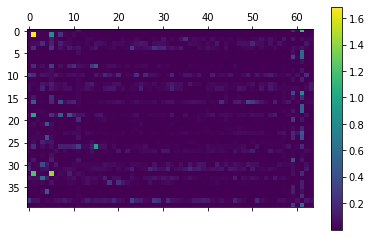

In [39]:
plt.matshow(tensor.factors[1][:40])
plt.colorbar()
plt.savefig('/home/makrai/repo/paper/Coling2020/verbtensor/img/nonneg-mx.png')

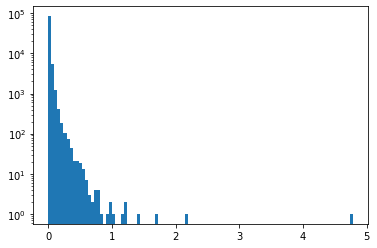

In [40]:
_ = plt.hist(tensor.factors[1].reshape(-1), log=True, bins=100)
plt.savefig('/home/makrai/repo/paper/Coling2020/verbtensor/img/nonneg-histg.png')

In [59]:
mode_names = ['nsubj', 'ROOT', 'dobj']

def show_latent(latent_i, mode_i):
    surf_indices = np.argsort(-tensor.factors[mode_i][:,latent_i])
    return latent_i, ', '.join([evalor.index[mode_names[mode_i]].inv[surf_i] for surf_i in surf_indices])

In [67]:
records = []
for i in range(6,16):
    records.append(show_latent(i, 0))
print(pd.DataFrame(records, columns=['dim', 'subjects']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                           subjects \\
dim &                                                    \\
\midrule
6   &  you, , that, we, I, they, company, user, he, -... \\
7   &  , system, -rrb-, we, device, report, study, he... \\
8   &  FIG., figure, which, -rrb-, we, table, chart, ... \\
9   &  stock, action, condition, development, sale, J... \\
10  &  play, value, day, round, war, number, conversa... \\
11  &  he, who, she, you, that, we, they, -rrb-, peop... \\
12  &  I, you, , he, who, they, study, which, user, s... \\
13  &  area, property, system, site, factor, device, ... \\
14  &  it, Council, Committee, board, Board, House, C... \\
15  &  we, , that, system, study, site, book, who, de... \\
\bottomrule
\end{tabular}



In [68]:
records = []
for i in range(10):
    records.append(show_latent(i, 1))
print(pd.DataFrame(records, columns=['dim', 'verbs']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                              verbs \\
dim &                                                    \\
\midrule
0   &  control, utilize, modify, use, manipulate, con... \\
1   &  have, include, provide, offer, give, contain, ... \\
2   &  move, regard, monitor, evaluate, control, opti... \\
3   &  grab, pull, put, throw, touch, knock, shove, p... \\
4   &  educate, assist, convince, persuade, kill, inf... \\
5   &  include, have, affect, contain, take, represen... \\
6   &  increase, decrease, reduce, measure, lower, bo... \\
7   &  provide, give, receive, offer, increase, have,... \\
8   &  build, expand, promote, improve, develop, enha... \\
9   &  provide, offer, facilitate, initiate, prevent,... \\
\bottomrule
\end{tabular}



In [70]:
records = []
for i in range(10):
    records.append(show_latent(i, 2))
print(pd.DataFrame(records, columns=['dim', 'objects']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                            objects \\
dim &                                                    \\
\midrule
0   &  system, structure, network, object, component,... \\
1   &  , what, that, way, \%, percent, I, \$, which, wh... \\
2   &  head, ball, ass, hand, cock, face, foot, finge... \\
3   &  people, he, I, she, other, you, we, woman, the... \\
4   &  amount, system, income, component, rate, chanc... \\
5   &  frequency, concentration, density, probability... \\
6   &  infrastructure, production, supply, business, ... \\
7   &  value, datum, information, number, amount, pro... \\
8   &  experience, ability, understanding, capability... \\
9   &  transmission, exposure, production, spread, tr... \\
\bottomrule
\end{tabular}



In [65]:
records = []
for i, j, k in list(zip(*np.unravel_index(np.argsort(-core.reshape(-1)), core.shape)))[:8]:
    records.append(show_latent(i, 0))
    records.append(show_latent(j, 1))
    records.append(show_latent(k, 2))
print(pd.DataFrame(records, columns=['dim', 'words']).set_index('dim').to_latex())

\begin{tabular}{ll}
\toprule
{} &                                              words \\
dim &                                                    \\
\midrule
19  &  -rsb-, -lsb-, disease, result, -lsb-\_NNS, -RSB... \\
22  &  -lsb-\_VBD, -lsb-\_VBP, -lsb-\_VBZ, -lsb-\_VB, -ls... \\
18  &  -rsb-, -rsb-\_NNS, -RSB-, -lsb-, 6, 1, 4, Page,... \\
0   &  , you, we, that, he, they, who, I, it, she, wh... \\
0   &  control, utilize, modify, use, manipulate, con... \\
0   &  system, structure, network, object, component,... \\
0   &  , you, we, that, he, they, who, I, it, she, wh... \\
4   &  educate, assist, convince, persuade, kill, inf... \\
3   &  people, he, I, she, other, you, we, woman, the... \\
0   &  , you, we, that, he, they, who, I, it, she, wh... \\
3   &  grab, pull, put, throw, touch, knock, shove, p... \\
2   &  head, ball, ass, hand, cock, face, foot, finge... \\
8   &  FIG., figure, which, -rrb-, we, table, chart, ... \\
15  &  illustrate, show, take, depict, make, use, rec... 

## Athlete ... race

In [18]:
embed = KeyedVectors(64)

In [19]:
embed.add_vectors(list(evalor.index['ROOT'].inv.values()), tensor.factors[1])

In [20]:
def predict_verb(subj='athlete', obj='race'):
    tensor1 = tensor.core
    tensor1 = tl.tenalg.mode_dot(tensor1, evalor.lookup(subj, 0), 0)
    tensor1 = tl.tenalg.mode_dot(tensor1, evalor.lookup(obj, 2), 1)
    return embed.most_similar([tensor1])

In [21]:
predict_verb()

[('have', 0.9841201901435852),
 ('include', 0.9124106764793396),
 ('provide', 0.8667762279510498),
 ('offer', 0.8448187708854675),
 ('contain', 0.8381587862968445),
 ('require', 0.7445492148399353),
 ('give', 0.6424943804740906),
 ('need', 0.6187449097633362),
 ('feature', 0.6024946570396423),
 ('affect', 0.5970800518989563)]

In [22]:
predict_verb(subj='user', obj='command')

[('contain', 0.861118733882904),
 ('provide', 0.8168653845787048),
 ('represent', 0.8076701760292053),
 ('require', 0.7967956066131592),
 ('constitute', 0.7953993082046509),
 ('feature', 0.7923411130905151),
 ('offer', 0.7908795475959778),
 ('have', 0.7721259593963623),
 ('give', 0.7590991854667664),
 ('affect', 0.7575748562812805)]

In [23]:
tensor.factors[0].shape

(1515, 64)

# Triples by `lmbda`

In [24]:
tensor_dir = config['DEFAULT']['ProjectDirectory']+'tensor/'
evalor = VerbTensorEvaluator(cutoff=50000, rank=128, weight='npmi', decomp_algo='parafac')
modes = ['nsubj', 'ROOT', 'dobj']

In [26]:
evalor.load_embeddings()

In [27]:
evalor.decomped_tns.weights.todense()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
i_word = [{i: w for w, i in evalor.index[j].items()} for j in modes]
vocab = [np.array([i_word[j][i] for i in range(len(i_word[j]))]) for j in range(len(i_word))]
for k, j in enumerate(
        #np.argsort(-ktensor.lmbda)[:4]):#
        range(evalor.decomped_tns.rank)):
    print(f'\n{k}')# {j}')
    for i, factor in enumerate(evalor.decomped_tns.factors):
        ids = np.argsort(factor[:,j].todense())[:7]
        print(vocab[i][ids])
        #print(['{:.1g}'.format(coord) for coord in ktensor.U[i][ids,j]])


0
['population' 'employment' 'bacterium' 'species' 'tissue' 'pain'
 'organism']
['indicate' 'apply' 'be' 'suggest' 'show' 'state' 'argue']
['' 'what' 'that' 'way' 'he' 'which' '-rrb-']

1
['value' 'length' 'structure' 'parameter' 'quality' 'requirement' 'size']
['exist' 'consist' 'vary' 'differ' 'allow' 'depend' 'evolve']
['job' 'statement' 'plant' 'competition' 'genre' 'business' 'audience']

2
['study' 'we' 'finding' 'researcher' 'course' 'datum' 'research']
['comprise' 'examine' 'investigate' 'evaluate' 'require' 'review'
 'support']
['presence' 'evidence' 'prevalence' 'desire' 'insight' 'origin'
 'specificity']

3
['' 'he' 'who' 'they' 'I' 'you' 'we']
['leave' 'enter' 'visit' 'use' 'break' 'join' 'build']
['study' 'task' 'investigation' 'research' 'project' 'test' 'survey']

4
['Foundation' 'Video' 'institution' 'Capital' 'Group' 'Player' 'College']
['play' 'watch' 'use' 'release' 'sing' 'study' 'record']
['$' 'degree' 'advantage' 'resource' 'power' 'influence' 'music']

5
['' 'th

['cut' 'serve' 'lose' 'enter' 'receive' 'include' 'finish']
['power' 'ourselves' 'battle' 'lip' 'horror' 'supply' 'oneself']

49
['' 'he' 'who' 'they' 'I' 'you' 'we']
['have' 'lose' 'reach' 'leave' 'hit' 'break' 'visit']
['challenge' 'pain' 'reality' 'hardship' 'grief' 'shock' 'thrill']

50
['' 'device' 'system' 'apparatus' 'assembly' 'embodiment' 'unit']
['include' 'comprise' 'have' 'provide' 'contain' 'dispose' 'employ']
['performance' 'power' 'design' 'desk' 'facility' 'value' 'Wi-Fi']

51
['' 'he' 'who' 'they' 'you' 'I' 'we']
['run' 'sell' 'join' 'form' 'drop' 'report' 'draw']
['' 'what' 'that' 'door' 'themselves' 'he' 'way']

52
['finger' 'hand' 'muscle' 'statement' 'spokesman' 'hair' 'spokesperson']
['perform' 'do' 'rub' 'record' 'schedule' 'stick' 'squeeze']
['concern' 'belief' 'expectation' 'desire' 'skin' 'symptom' 'requirement']

53
['yankee' 'Yankees' 'Dallas' 'A' 'Dylan' 'Devils' 'offense']
['show' 'meet' 'present' 'report' 'demonstrate' 'represent' 'receive']
['title' 'cha

['building' 'facility' 'shell' 'house' 'amenity' 'Beautifully' 'bridge']
['include' 'contain' 'use' 'produce' 'comprise' 'add' 'preserve']
['building' 'integrity' 'facility' 'infrastructure' 'aircraft' 'vehicle'
 'government']

97
['muscle' 'health' 'compound' 'jury' 'ball' 'lung' 'margin']
['include' 'contain' 'regulate' 'fill' 'control' 'disrupt' 'improve']
['land' 'territory' 'planet' 'Iraq' 'transmission' 'activation' 'money']

98
['' 'you' 'I' 'we' 'he' 'they' 'that']
['have' 'cut' 'add' 'chop' 'remove' 'slice' 'place']
['' 'what' 'that' '-rsb-' 'belief' 'pool' 'himself']

99
['plate' 'brain' 'layer' 'material' 'particle' 'area' 'portion']
['heat' 'install' 'join' 'form' 'organize' 'manufacture' 'purchase']
['meeting' 'material' 'those' 'disk' 'onion' 'panel' 'event']

100
['amenity' 'example' 'term' 'list' 'Ipso' 'antibody' 'publication']
['include' 'provide' 'improve' 'ensure' 'enhance' 'offer' 'require']
['' 'quality' 'efficiency' 'safety' 'stability' 'performance' 'security']


|rank|$\lambda$|e.g.|
|----|---------|----|
|16|1|topic/example (2) provide/offer (2) assistance/guidance|
|32|1|Android (3)  win degree (1)|
|64|1|I describe (1) game/story (2)|